<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%99%80%EC%9D%B8%ED%92%88%EC%A7%88%EB%B6%84%EB%A5%98_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 라이브러리 import


In [24]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
 
## 실제 모델링을 위한 패키지
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics
 

# 1.데이터 불러오기
   - Data description: 데이터의 전반적인 정보 파악
   - train/ test 데이터 분리



In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
smpl_sub = pd.read_csv('sample_submission.csv')

# 2. EDA, 데이터 전처리

In [ ]:
train.head() #13개 변수

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test.head() #quality 변수 없음

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
train.info() #null 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


<ipython-input-7-0729a13d2fe5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train.corr(),annot = True)


<Axes: >

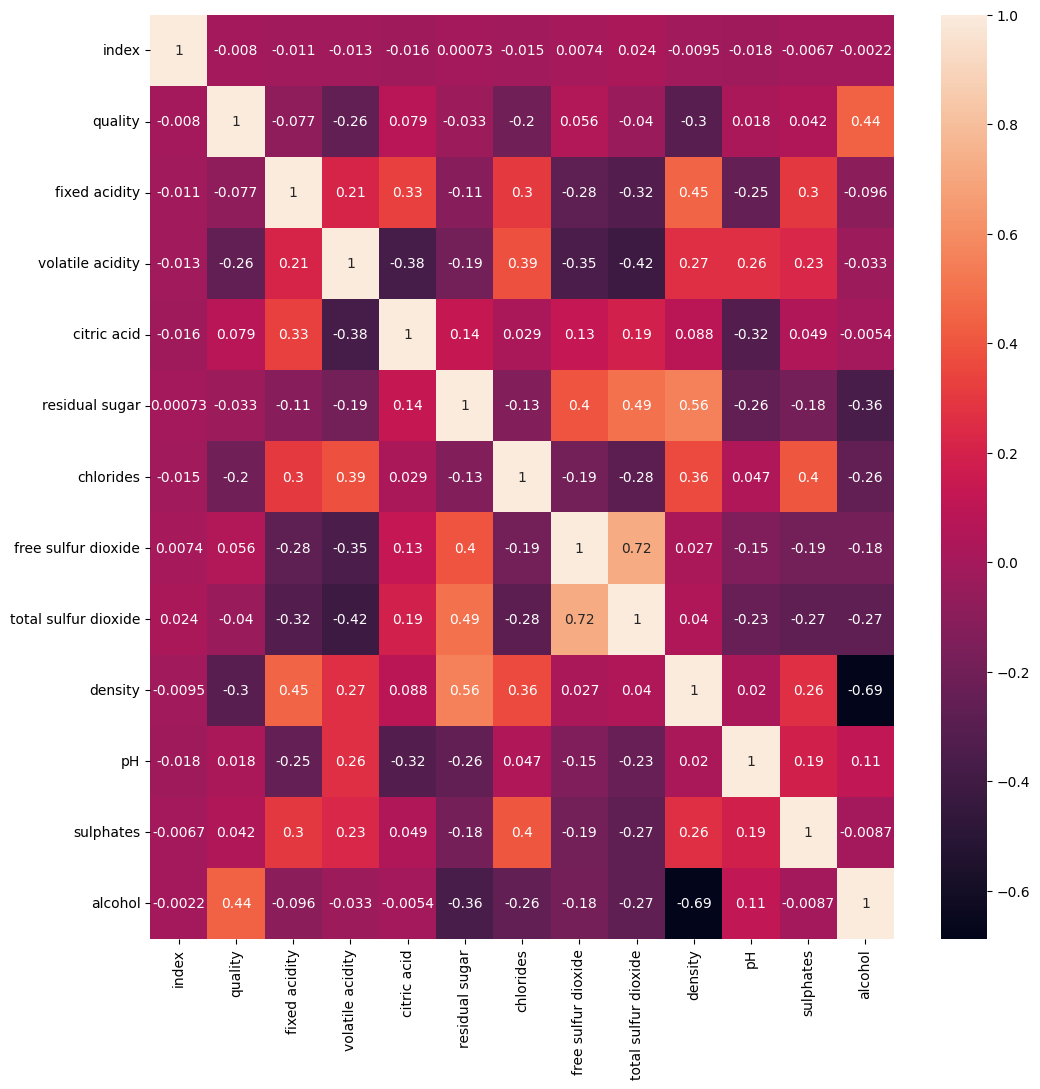

In [ ]:
# train 변수 간 상관관계
plt.figure(figsize=(12,12))
sns.heatmap(data=train.corr(),annot = True) 

* quality 변수와 alcol 상관관계 높음=0.44

<Axes: xlabel='quality', ylabel='count'>

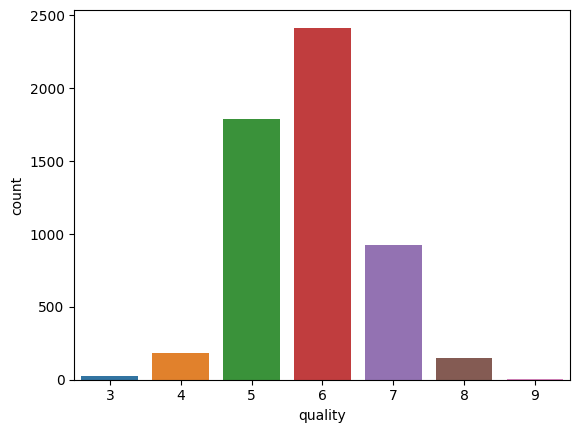

In [ ]:
# 데이터 분포 확인
# 1. target=quality

train['quality'].value_counts()
sns.countplot(x = train['quality'])

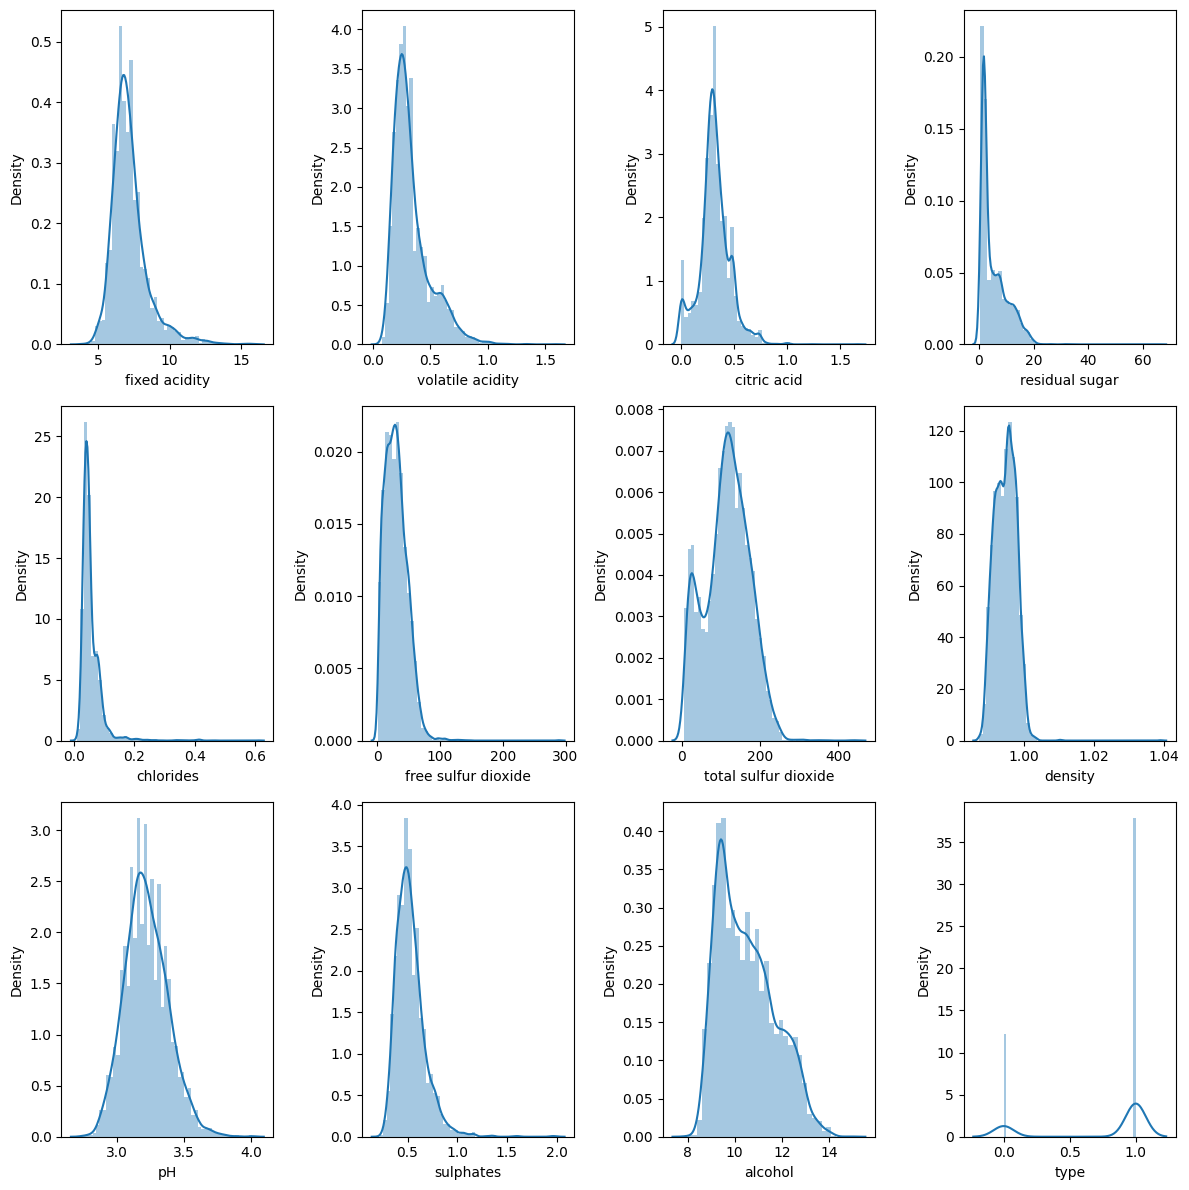

In [ ]:
# 2. 변수별 분포 시각화

plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

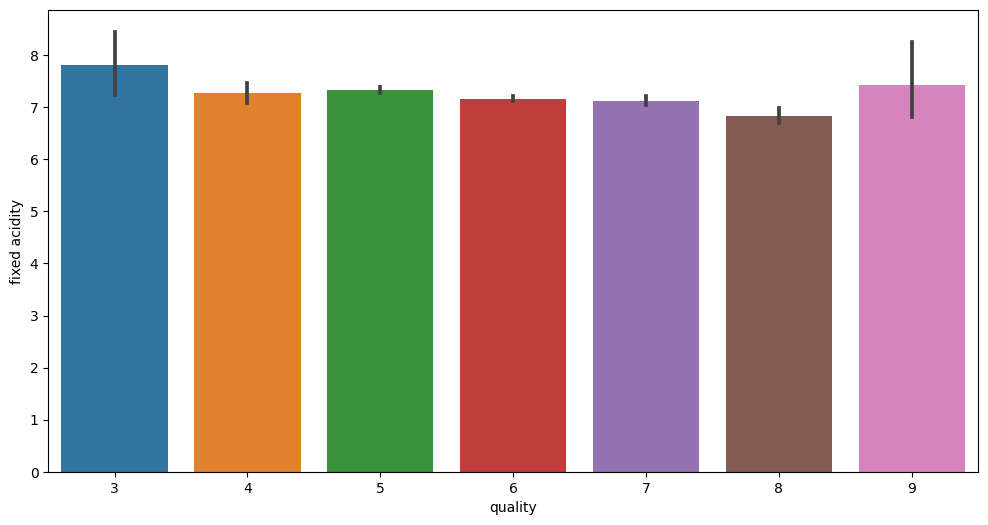

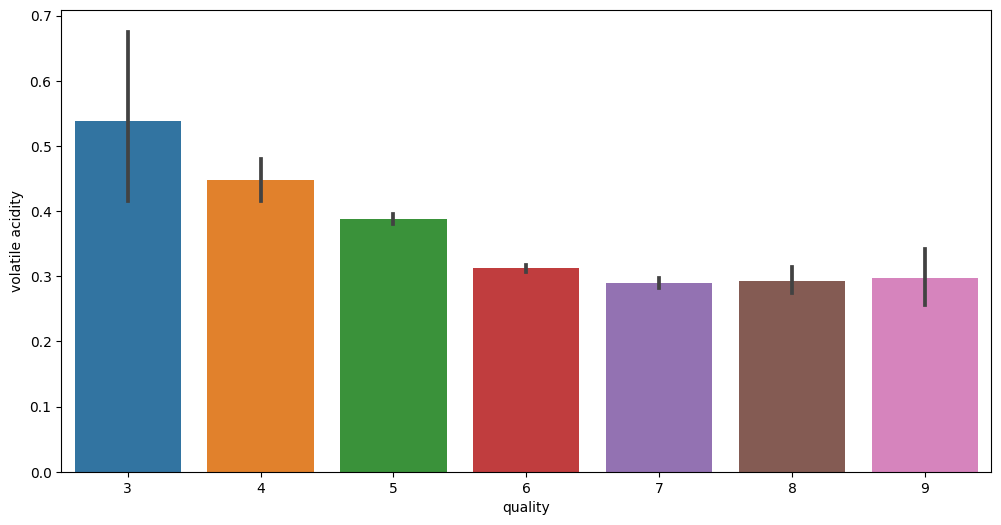

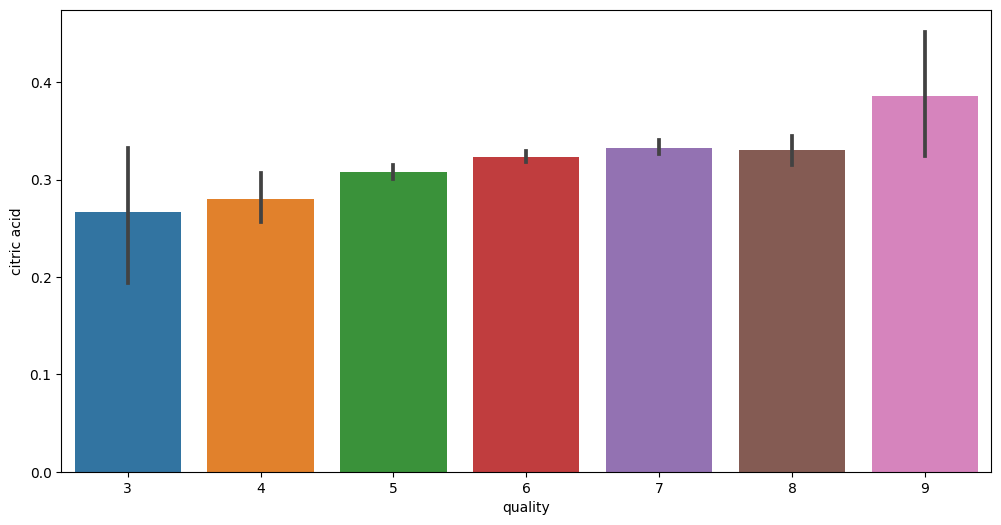

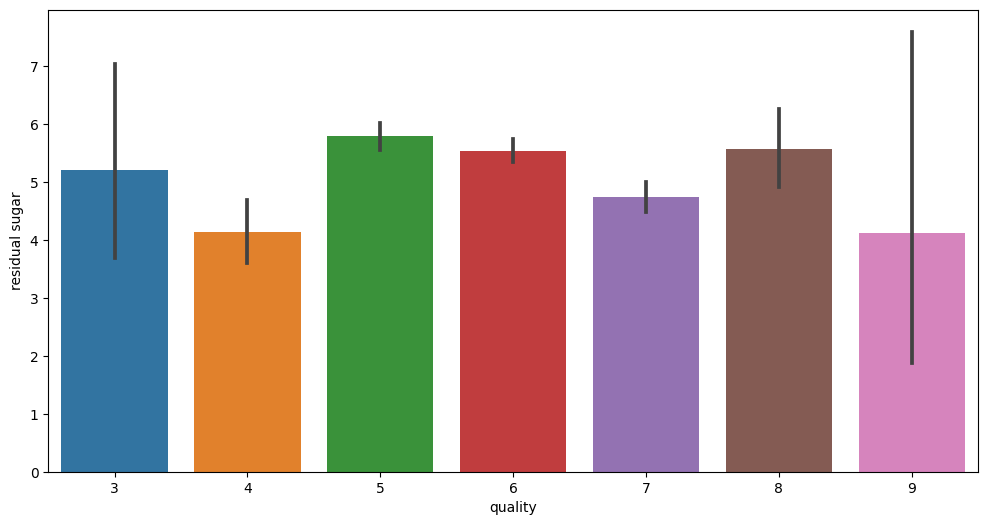

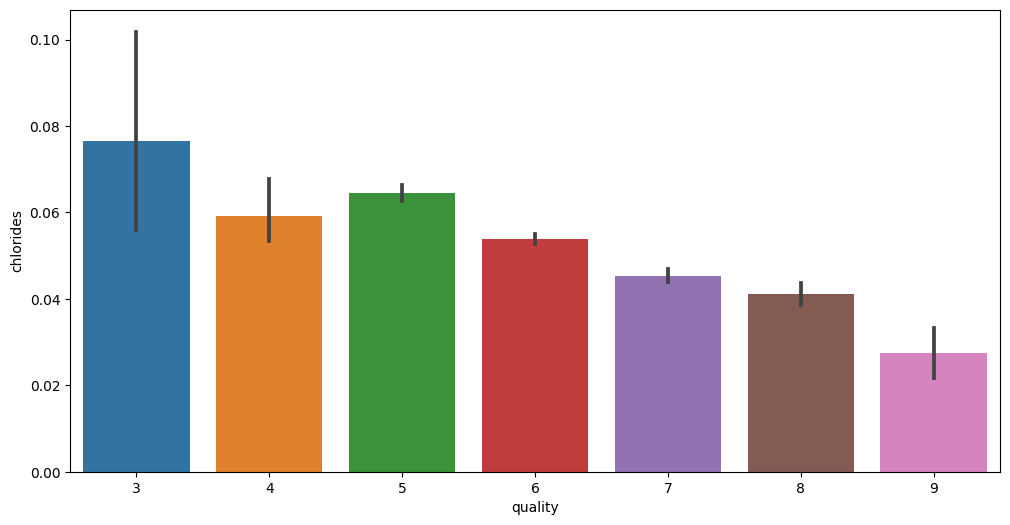

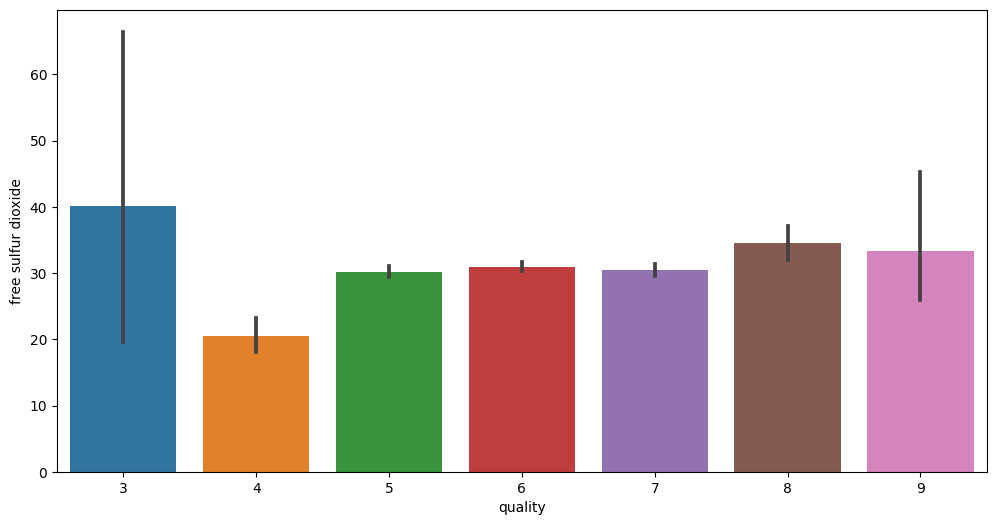

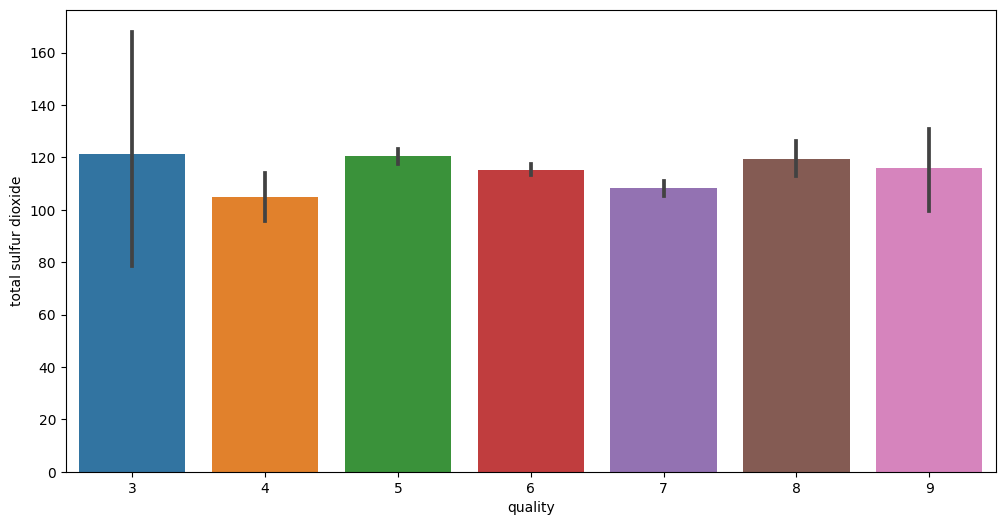

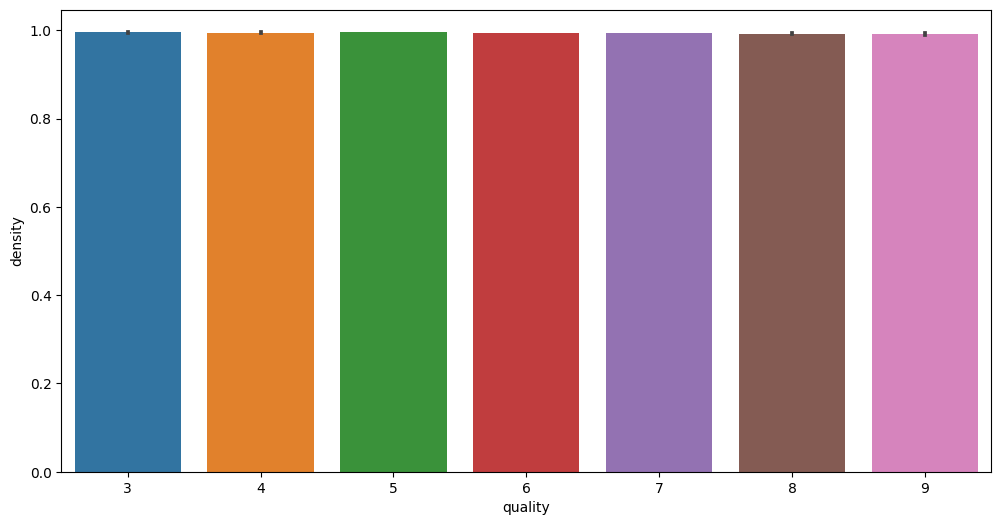

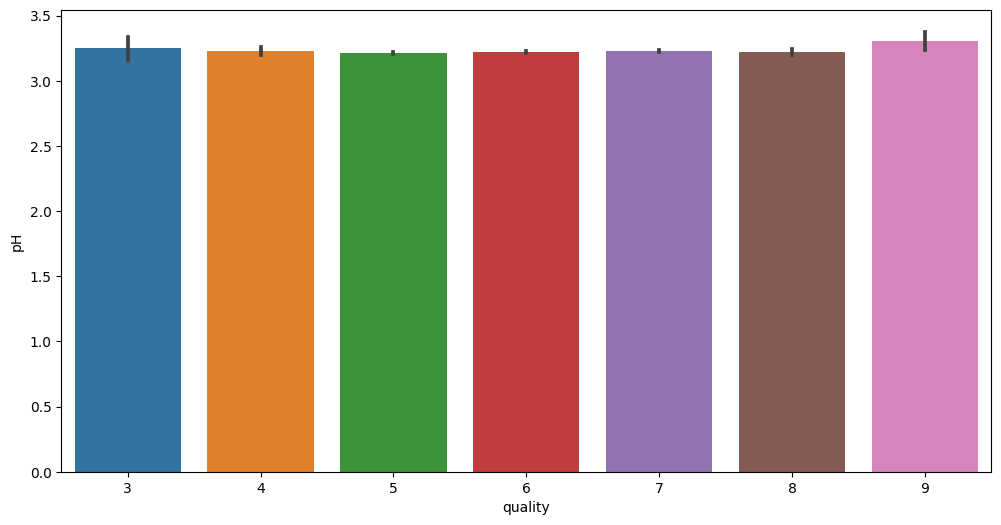

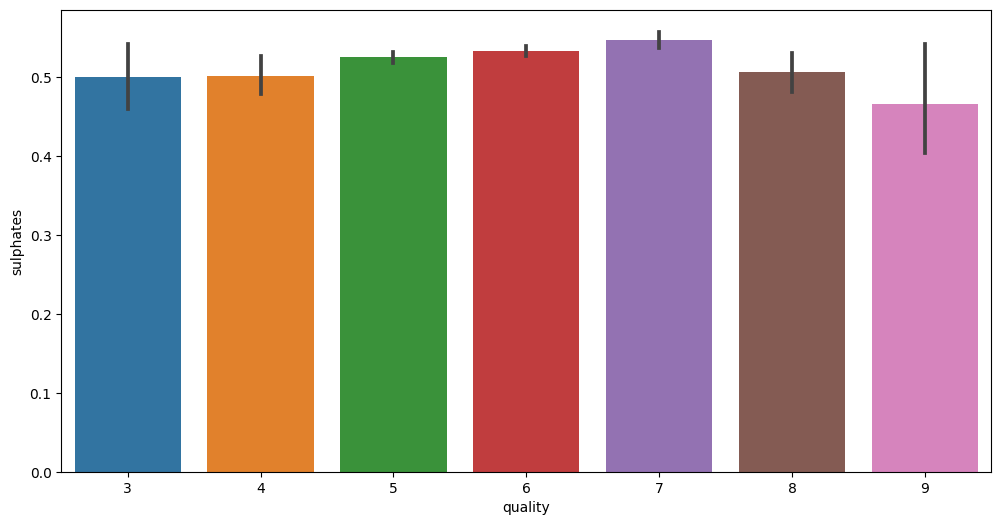

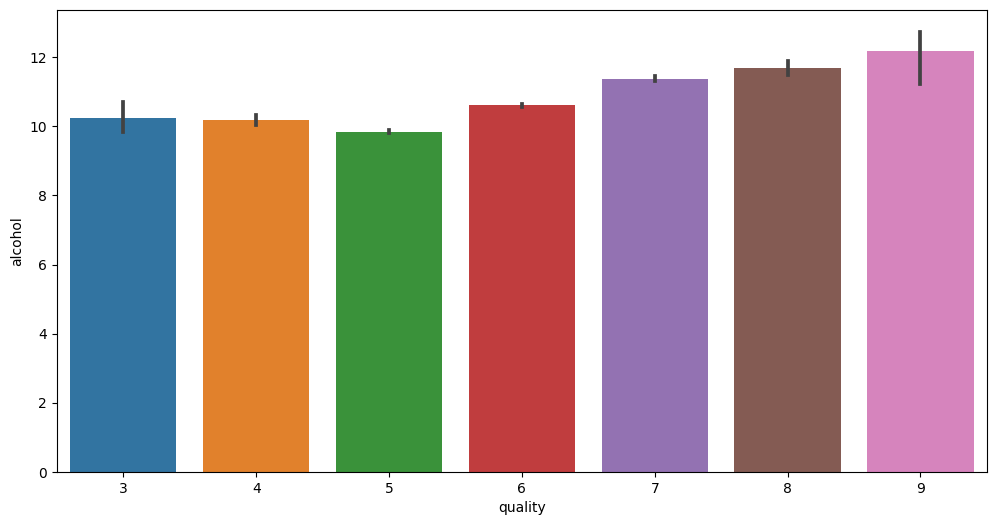

In [ ]:
# 3. 피처 변수와 타겟 변수 관계 시각화

plt.figure(figsize=(12,12))
for i in range(1,13):
  plt.subplot(3,4,i)
  sns.displot(train.iloc[:,i])
plt.tight_layout()
plt.show()

for i in range(11):
  fig=plt.figure(figsize=(12,6))
  sns.barplot(x='quality',y=train.columns[i+2],data=train)



In [ ]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [ ]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


# 3. 모델링


In [108]:
# 랜덤 포레스트 -> 제출시 0.696으로 가장 높게 나왔다.

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop('index',axis = 1 ,inplace =True)
test.drop('index',axis = 1 ,inplace =True)

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

X = train.drop(['quality'], axis = 1) #feature
y = train['quality'] #target

from sklearn.ensemble import RandomForestClassifier

#모델
model=RandomForestClassifier()

#모델 학습
model.fit(X,y)

#test 데이터 예측
y_pred = model.predict(test)

smpl_sub = pd.read_csv('sample_submission.csv')
smpl_sub['quality']=y_pred
smpl_sub

smpl_sub.to_csv('randomforest.csv', index=False)

In [111]:
# 전처리 코드 전체

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
smpl_sub = pd.read_csv('sample_submission.csv')

train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

# type에는 white와 red 두 종류-> 0,1 로 변환

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['type'])
train['type'] = le.transform(train['type'])
test['type'] = le.transform(test['type'])

# 피처,타겟 변수 분리
X = train.drop(['quality'], axis = 1) #feature
y = train['quality'] #target

#표준화

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X) #변수들간 스케일이 달라서 표준화 진행
X=pd.DataFrame(X,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','type'])
test = sc.fit_transform(test)
test=pd.DataFrame(test,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','type'])

# Voting Classifier 

In [53]:
# 앙상블

# 보팅 분류기, VotingClassifier 클래스
# 로지스틱 회귀, KNN 기반 보팅 분류기

import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

train.drop('index',axis = 1 ,inplace =True)
test.drop('index',axis = 1 ,inplace =True)

X = train.drop('quality',axis= 1)
y = train['quality']

# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [("LR", lr_clf), ("KNN", knn_clf)], voting = "soft")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))


# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print("{0} 정확도: {1:4f}".format(class_name, accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting 분류기 정확도: 0.5009
LogisticRegression 정확도: 0.458182
KNeighborsClassifier 정확도: 0.473636


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 전체적으로 정확도가 매우 떨어진다.

# 스태킹 앙상블

In [77]:
# 전처리 코드 전체

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
smpl_sub = pd.read_csv('sample_submission.csv')

train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

# type에는 white와 red 두 종류-> 0,1 로 변환

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['type'])
train['type'] = le.transform(train['type'])
test['type'] = le.transform(test['type'])

# 피처,타겟 변수 분리
X = train.drop(['quality'], axis = 1) #feature
y = train['quality'] #target

#표준화

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X) #변수들간 스케일이 달라서 표준화 진행
X=pd.DataFrame(X,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','type'])
test = sc.fit_transform(test)
test=pd.DataFrame(test,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','type'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)



In [78]:
# 기본 스태킹 모델

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [103]:

# 개별 ML 모델 생성
knn_clf=KNeighborsClassifier(n_neighbors=4)
rf_clf=RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf=DecisionTreeClassifier(random_state=0)
ada_clf=AdaBoostClassifier(n_estimators=100)
lgbm_clf=LGBMClassifier(random_state=0)
gb_clf = GradientBoostingClassifier(random_state=0)


# 개별 모델들 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)
lgbm_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정
knn_pred=knn_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
dt_pred=dt_clf.predict(X_test)
ada_pred=ada_clf.predict(X_test)
lgbm_pred=lgbm_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)

print('KNN 정확도:{0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도:{0:.4f}'.format(accuracy_score(y_test, ada_pred)))
print('LGBM 정확도:{0:.4f}'.format(accuracy_score(y_test, lgbm_pred)))
print('GB 정확도:{0:.4f}'.format(accuracy_score(y_test, gb_pred)))

smpl_sub = pd.read_csv('sample_submission.csv')
smpl_sub['quality'] = rf_pred[0:1000]
smpl_sub.to_csv('rf_submission.csv', index=False)

KNN 정확도:0.5536
랜덤 포레스트 정확도:0.6927
결정 트리 정확도:0.5955
에이다부스트 정확도:0.3936
LGBM 정확도:0.6564
GB 정확도:0.5682


* 랜덤 포레스트, LGBM 정확도가 조금 높게 나왔다.

# XGBoost = 0.675

In [112]:
# XGBoost
from xgboost import XGBClassifier

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop('index',axis = 1 ,inplace =True)
test.drop('index',axis = 1 ,inplace =True)

# Onehot Encoding (pd.get_dummies())
train_df = pd.get_dummies(train)
test_df = pd.get_dummies(test)

#Label Encoding / 레이블 인코딩으로 숫자를 바꾸려고 0,1,2
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_df['quality']=encoder.fit_transform(train_df['quality'])

# 모델 학습

#모델
model = XGBClassifier()

# X 는 train에서 quality 를 제외한 모든 변수
# y 는 train의 qulity 변수
X = train_df.drop('quality',axis= 1)
y = train_df['quality']



model.fit(X,y)

# predict 메소드와 원핫 인코딩한 test 데이터를 이용해 품질 예측
pred = model.predict(test_df)
pred = encoder.inverse_transform(pred)

smpl_sub = pd.read_csv('sample_submission.csv')
smpl_sub['quality']=pred
smpl_sub.head()

smpl_sub.to_csv('XGBoost.csv', index=False)

# 하이퍼 파라미터 튜닝
* 성능이 비교적 좋은 모델에 대해 튜닝
* LGBM
* 랜덤포레스트


In [113]:
# LGBM
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate' : [0.005, 0.01, 0.05],
    'n_estimators' : [80,90,100,110],
    'num_leaves' : [20, 30, 40],
    'max_depth' : [5,7,9]
}


lgbm_clf = LGBMClassifier(n_estimators=200)
grid_cv=GridSearchCV(lgbm_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))



최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 110, 'num_leaves': 20}
최고 예측 정확도: 0.5934


In [115]:
# 최적 모델
lgbm_clf1 = LGBMClassifier(learning_rate=0.05, max_depth=9, n_estimators=110, num_leaves=20)
lgbm_clf1.fit(X_train, y_train)
pred = lgbm_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

smpl_sub = pd.read_csv('sample_submission.csv')
smpl_sub['quality'] = pred[0:1000]
smpl_sub.to_csv('lgbm_submission.csv', index=False)

예측 정확도: 0.6100


In [61]:
# 랜덤 포레스트 

from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100,500,1000],
    'max_depth':[8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))



최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.5870


In [86]:
# 최적 모델 생성

rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.6073
